# COMPARE REAL AND PRIVATE K-MEANS

In [1]:
#import argparse
import numpy as np
import os
import pickle
import scipy.io

from private_kmeans import clustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt




In [2]:
if not os.path.exists('exp1/figures/'):
    os.makedirs('exp1/figures/')


# Define parameters

np.random.seed(7)
K = 100     # Latent dimensions 100 - 200
m = 100000   # Number users
n=500      # Number of samples



In [3]:
U = normalize(np.random.normal(size=(m,K)))
V = normalize(np.random.normal(size=(n,K)))
lam = np.exp(np.matmul(U,V.T))
X = np.random.poisson(lam)




print('   Finished generating data!     \n')
print('{} Latent dimensions, {} items, {} users \n'.format(K,n,m))

np.save('exp1/poissondata_m_{}_n_{}_k_{}.npy'.format(m,n,K),X)
np.save('exp1/poissondataU_m_{}_n_{}_k_{}.npy'.format(m,n,K),U)
np.save('exp1/poissondataV_m_{}_n_{}_k_{}.npy'.format(m,n,K),V)

   Finished generating data!     

100 Latent dimensions, 500 items, 100000 users 



In [4]:
# parameters to compare
#ks = [20, 40,60,64,80,100]
ks = [25,50,75,100,200]
epsilons = [0.01,0.1,1]


### Evaluate real k-means



In [ ]:
losses_real = []
centers_real = []
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X)
    losses_real.append(kmeans.inertia_)
    centers_real.append(kmeans.cluster_centers_)
    print('finished {}'.format(k))
    

finished 25
finished 50
finished 75
finished 100
finished 200


In [7]:
pickle.dump(losses_real, open('exp1/poisson_kmeansLoss_m_{}_n_{}_k_{}.p'.format(m,n,k), 'wb'))
pickle.dump(centers_real, open('exp1/poisson_kmeansCenters_m_{}_n_{}_k_{}.p'.format(m,n,k), 'wb'))

### Evaluate private k-means


In [9]:
del kmeans

In [10]:
delta = 0.1

RANGE = 4
SIDE_LENGTH = 2*np.amax(np.abs(X))


In [11]:
losses_pr = {}
centers_pr = {}


In [ ]:
for eps in epsilons:
    for k in ks:
        res = clustering( X.T,k=k,epsilon=eps,delta=delta,RANGE= RANGE, side_length=SIDE_LENGTH , T=1)
        losses_pr[(k,eps)] = res[4]
        centers_pr[(k,eps)]=res[0]
        pickle.dump(losses_pr, open('exp1/poisson_privateLoss_m_{}_n_{}_k_{}.p'.format(m,n,K), 'wb'))
        pickle.dump(centers_pr, open('exp1/poisson_privateCenters_m_{}_n_{}_k_{}.p'.format(m,n,K), 'wb'))
        

Range : 26.526403487380268 

 Round: 1   of  1 

   Projecting in dim 5
     0-th trial for candidate set

             offset: [-1.99093657 -7.91746824 10.88304116  0.31957976 -1.07188472]
     1-th trial for candidate set

             offset: [ 9.28360985  6.99594241 -3.17196202  7.05053188  9.31882114]
   Candidate set finished. Produced (3, 5) candidates

3 candidates, 25 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th ite

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 


 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

Range : 26.526403487380268 

 Round: 1   of  1 

   Projecting in dim 5
     0-th trial for candidate set

             offset: [ 5.87997405  7.84271993 -9.50098961  1.58024763 -2.36889379]
     1-th trial for candidate set

             offset: [ 0.09553784 10.74119271 -9.04790042 10.21762714 -2.53845477]
   Candidate set finished. Produced (9, 5) candidates

9 candidates, 25 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th ite

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

Starting Lloyd.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

Range : 26.526403487380268 

 Round: 1   of  1 

   Projecting in dim 5
     0-th trial for candidate set

             offset: [10.77554651  7.55223516 -7.72881738 -5.00512258 -1.54403449]
     1-th trial for candidate set

             offset: [ 4.37480758 -0.5893463   1.12324891  1.6549593   8.06849352]
   Candidate set finished. Produced (69, 5) candidates

69 candidates, 50 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iter

   Candidate set finished. Produced (75, 5) candidates

75 candidates, 100 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 fo

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

In [7]:
import numpy as np
int(27*10*np.log(173/1)),int(100*10*np.log(173/1))

(1391, 5153)

# PLOT

In [6]:
import matplotlib.pyplot as plt
colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377']

In [7]:
losses_pr = pickle.load(open('exp1/poisson_privateLoss_m_100000_n_500_k_100', 'rb'))
losses_real = pickle.load(open('exp1/poisson_kmeansLoss_m_100000_n_500_k_100', 'rb'))


 ### <span style="color:blue"> *k*-means loss vs level of privacy for different *k*'s</span>

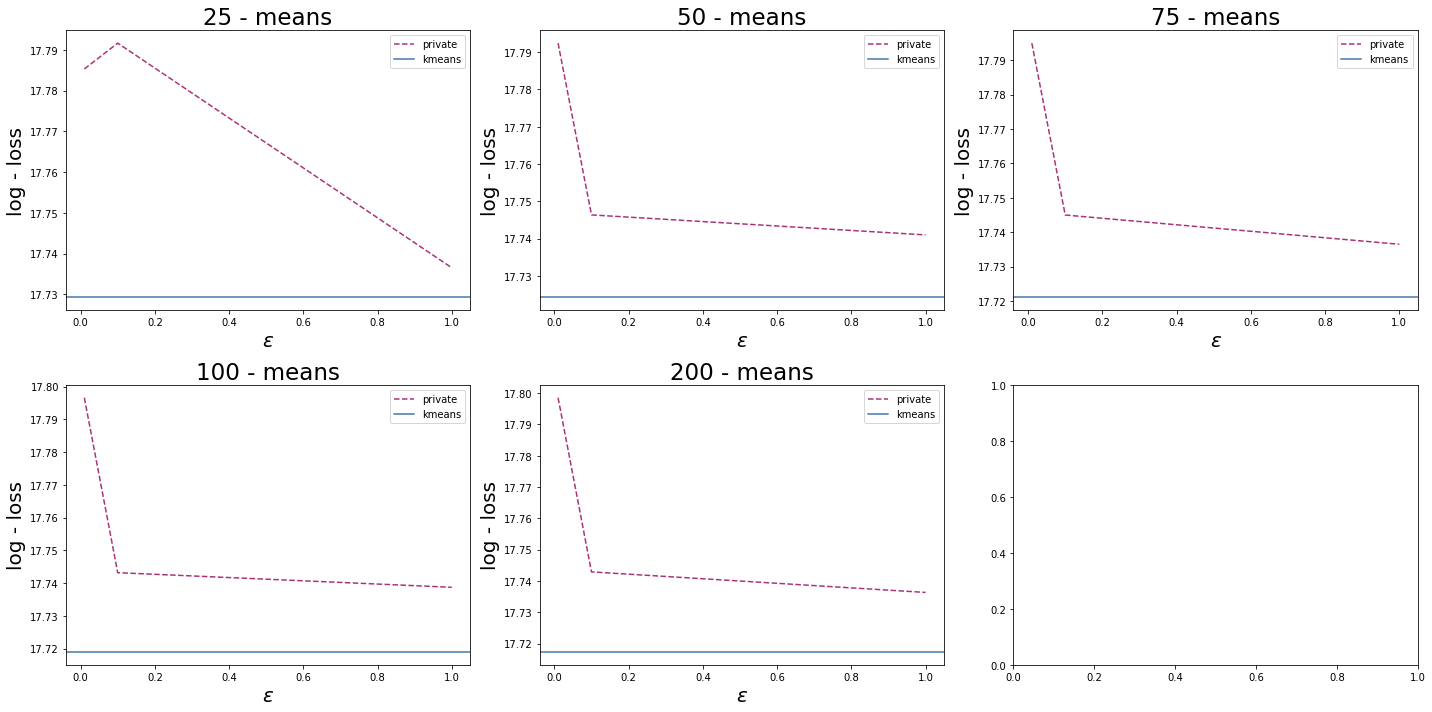

In [13]:
fig, axs = plt.subplots(2,3, figsize=(20, 10))
  
for j in range(len(ks)):
    r= j//3
    c = j%3
    axs[r,c].plot(epsilons, [np.log(losses_pr[(ks[j],epsilons[l])] )for l in range(0,len(epsilons))], label = 'private', linestyle='--', color = colors[5])
    axs[r,c].axhline(np.log(losses_real[j]), color = colors[0], label = 'kmeans')
    #axs[r,c].axhline(np.log(REAL_LOSS), color = 'purple', label = 'real')
    axs[r,c].legend()
    axs[r,c].set_xlabel('$ \epsilon$', fontsize = 20)
    axs[r,c].set_ylabel('log - loss', fontsize = 20)
    axs[r,c].set_title('{} - means'.format(ks[j]), fontsize = 23)
fig.tight_layout() 
plt.show()

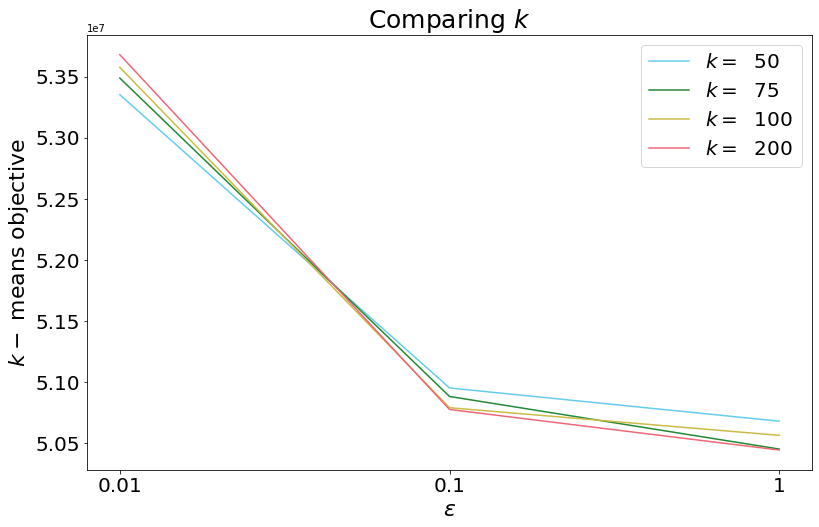

In [13]:
plt.figure( figsize=(13, 8))

for j in range(1,len(ks)):
    plt.plot(np.arange(len(epsilons)), [losses_pr[(ks[j],epsilons[l])] for l in range(0,len(epsilons))], label = '$k = $  {} '.format(ks[j]), color = colors[j])
    #axs[r,c].axhline(np.log(REAL_LOSS), color = 'purple', label = 'real')
    plt.xlabel('$ \epsilon $', fontsize = 22)
    plt.ylabel('$k - $ means objective', fontsize = 22)
    plt.title('Comparing $ k $ ', fontsize = 25)
#plt.plot(epsilons, [np.log(losses_real[l]) for l in range(1,len(ks))], color = 'red', label = 'kmeans')
plt.legend(loc = 'upper right', fontsize = 20)
plt.xticks(np.arange(len(epsilons)),epsilons, fontsize=20)
plt.yticks( fontsize=20)

#plt.xti

#set_tick_params(labelsize=25)
#plt.yaxis.set_tick_params(labelsize=25)
plt.savefig('exp1/figures/lossVsEps_differentKs_newPal.pdf')
#plt.xlim((0,3))
#plt.tight_layout() 
plt.show()

In [61]:
losses_real, losses_pr[(100,1)]

([50085616.95136723,
  49834893.28536198,
  49675440.82619968,
  49571920.7303404,
  49490085.84752982],
 array([50562260.00400549]))

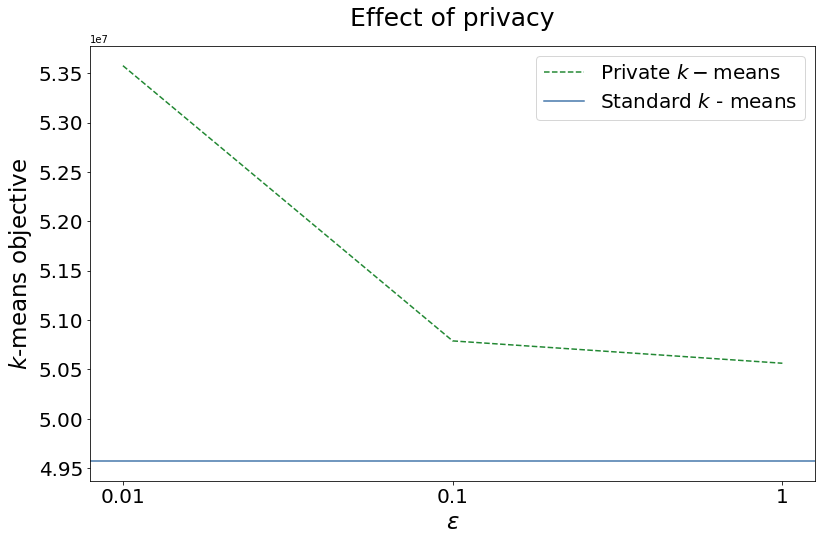

In [15]:
# Same as above only 100 - ks

fig, ax = plt.subplots(figsize=(13,8))
#fig.subplots_adjust(top=,bottom=0.15, left=0.2)


k = 100

ax.plot(np.arange(len(epsilons)), [losses_pr[(k,epsilons[l])] for l in range(0,len(epsilons))], label = 'Private $k-$means', color = colors[2], linestyle = '--')
ax.axhline(losses_real[3],  color = colors[0], label = 'Standard $k$ - means')

ax.set_xlabel('$ \epsilon $', fontsize = 23)
ax.set_ylabel('$k$-means objective', fontsize = 23)
ax.set_title('Effect of privacy', fontsize = 25, pad = 20)
ax.legend(loc = 'upper right', fontsize = 20)
ax.set_xticks(np.arange(len(epsilons)))
ax.set_xticklabels(labels = epsilons)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig('exp1/figures/lossVsEps_k100_newPal.pdf')
#plt.xlim((0,3))
#plt.tight_layout() 
plt.show()

 ### <span style="color:blue"> *k*-means loss vs number of *k*'s</span>

The number of k-means does not improve significantly the objective after 100

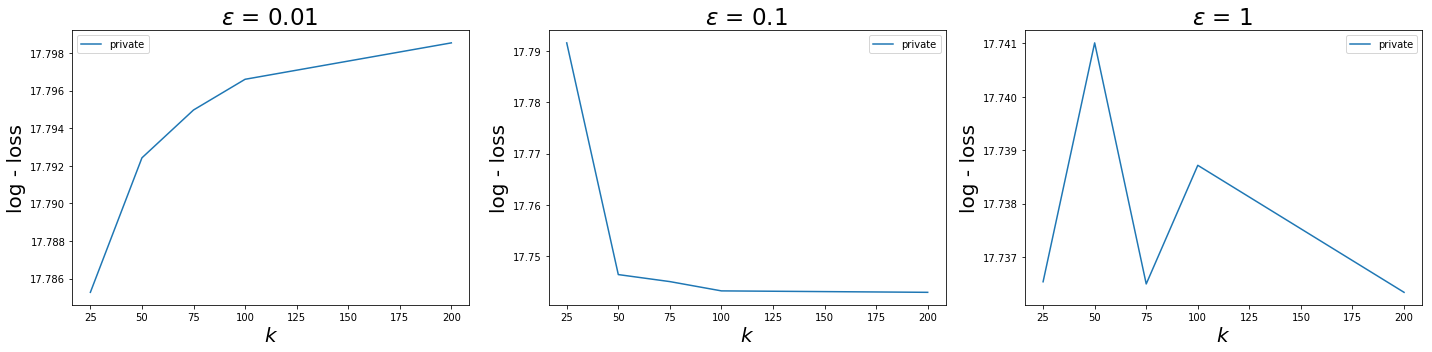

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    
for j in range(len(epsilons)):
    axs[j].plot(ks, [np.log(losses_pr[(ks[l],epsilons[j])]) for l in range(0,len(ks))], label = 'private')
    #axs[r,c].plot(ks, [np.log(losses_real[l]) for l in range(len(ks))], color = 'red', label = 'kmeans')
    #axs[r,c].axhline(np.log(REAL_LOSS), color = 'purple', label = 'real')
    axs[j].legend()
    axs[j].set_xlabel('$ k $', fontsize = 20)
    axs[j].set_ylabel('log - loss', fontsize = 20)
    axs[j].set_title('$\epsilon$ = {} '.format(epsilons[j]), fontsize = 23)
fig.tight_layout() 
plt.show()

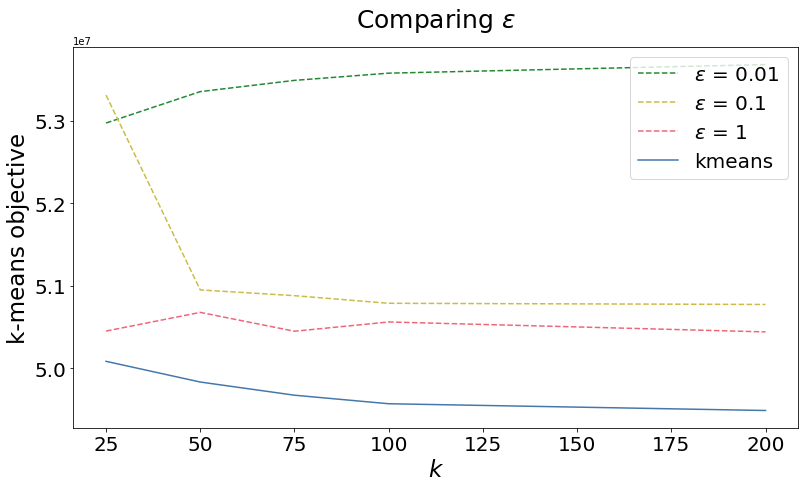

In [17]:
plt.figure( figsize=(13, 7))

    
for j in range(len(epsilons)):
    plt.plot(ks, [losses_pr[(ks[l],epsilons[j])] for l in range(0,len(ks))], label = '$\epsilon$ = {} '.format(epsilons[j]), color = colors[j+2], linestyle = '--')
    #axs[r,c].axhline(np.log(REAL_LOSS), color = 'purple', label = 'real')
    plt.xlabel('$ k $', fontsize = 23)
    plt.ylabel('k-means objective', fontsize = 23)
    plt.title('Comparing $\epsilon$', fontsize = 25, pad = 20)
plt.plot(ks, [losses_real[l] for l in range(len(ks))], color = colors[0], label = 'kmeans')
plt.legend(loc = 'upper right', fontsize = 20)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)


plt.savefig('exp1/figures/lossVsK_diffEpsilons_newPal.pdf')
plt.show()